# Sales Analysis

In [1]:
# Import required libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to SQLite database (use your path)
db_path = r"C:\Users\hp\Downloads\sales_data.db"
conn = sqlite3.connect(db_path)

## Total quantity and revenue per product

In [5]:
query = """
SELECT 
    product_name AS product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product_name
"""

# Load results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

In [6]:
# Print results
print("Sales Summary:")
print(df)

Sales Summary:
      product  total_qty   revenue
0  Headphones         10   20000.0
1    Keyboard          7   10500.0
2      Laptop          2  150000.0
3      Mobile          5   75000.0
4     Monitor          3   36000.0


<Figure size 800x500 with 0 Axes>

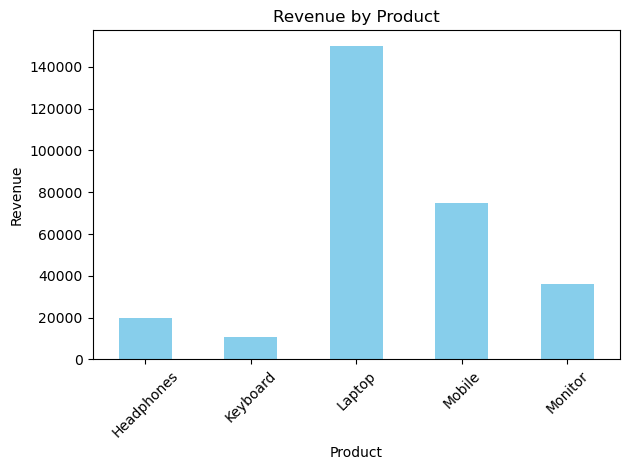

In [7]:
# Step 5: Plot simple bar chart for Revenue
plt.figure(figsize=(8,5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color="skyblue")

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart (optional)
plt.savefig("sales_chart.png")

# Show the chart
plt.show()


## Top Selling Product by Revenue

In [8]:
query_top_revenue = """
SELECT product_name, SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product_name
ORDER BY total_revenue DESC
LIMIT 1
"""
df_top_revenue = pd.read_sql_query(query_top_revenue, conn)
print("Top Selling Product by Revenue:")
print(df_top_revenue)


Top Selling Product by Revenue:
  product_name  total_revenue
0       Laptop       150000.0


## Top Selling Product by Quantity

In [9]:
query_top_qty = """
SELECT product_name, SUM(quantity) AS total_quantity
FROM sales
GROUP BY product_name
ORDER BY total_quantity DESC
LIMIT 1
"""
df_top_qty = pd.read_sql_query(query_top_qty, conn)
print("Top Selling Product by Quantity:")
print(df_top_qty)


Top Selling Product by Quantity:
  product_name  total_quantity
0   Headphones              10


## Daily Revenue Trend

Daily Revenue Trend:
    sale_date  daily_revenue
0  2025-09-01       150000.0
1  2025-09-02        75000.0
2  2025-09-03        20000.0
3  2025-09-04        36000.0
4  2025-09-05        10500.0


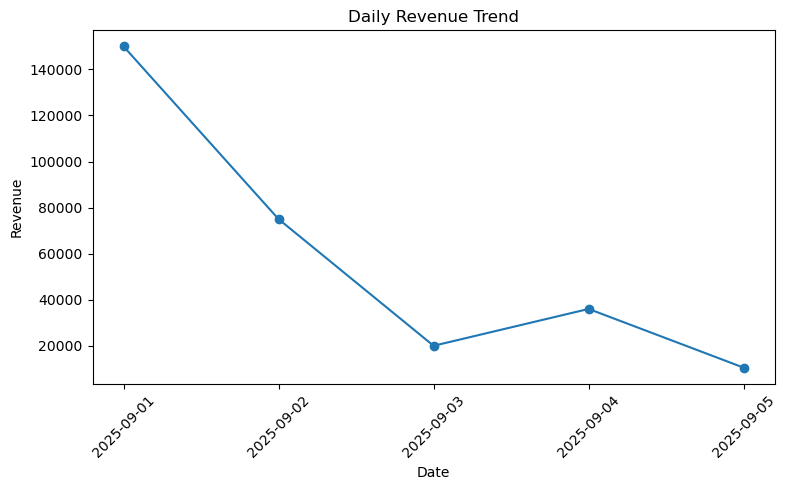

In [10]:
query_daily_revenue = """
SELECT sale_date, SUM(quantity * price) AS daily_revenue
FROM sales
GROUP BY sale_date
ORDER BY sale_date
"""
df_daily_revenue = pd.read_sql_query(query_daily_revenue, conn)

print("Daily Revenue Trend:")
print(df_daily_revenue)

# Plot daily revenue
plt.figure(figsize=(8,5))
plt.plot(df_daily_revenue['sale_date'], df_daily_revenue['daily_revenue'], marker='o')
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Average Order Value (AOV)

In [11]:
query_aov = """
SELECT ROUND(SUM(quantity * price) * 1.0 / COUNT(DISTINCT sale_id), 2) AS avg_order_value
FROM sales
"""
df_aov = pd.read_sql_query(query_aov, conn)
print("Average Order Value (AOV):")
print(df_aov)


Average Order Value (AOV):
   avg_order_value
0          58300.0


## Revenue Contribution % by Product

In [12]:
query_revenue_share = """
SELECT 
    product_name,
    ROUND(SUM(quantity * price) * 100.0 / (SELECT SUM(quantity * price) FROM sales), 2) AS revenue_percent
FROM sales
GROUP BY product_name
ORDER BY revenue_percent DESC
"""
df_revenue_share = pd.read_sql_query(query_revenue_share, conn)
print("Revenue Contribution by Product (%):")
print(df_revenue_share)


Revenue Contribution by Product (%):
  product_name  revenue_percent
0       Laptop            51.46
1       Mobile            25.73
2      Monitor            12.35
3   Headphones             6.86
4     Keyboard             3.60


## Best Sales Day

In [13]:
query_best_day = """
SELECT sale_date, SUM(quantity * price) AS revenue
FROM sales
GROUP BY sale_date
ORDER BY revenue DESC
LIMIT 1
"""
df_best_day = pd.read_sql_query(query_best_day, conn)
print("Best Sales Day:")
print(df_best_day)


Best Sales Day:
    sale_date   revenue
0  2025-09-01  150000.0


In [14]:
# lose the connection
conn.close()

## Business Insights from Sales Analysis

### Top Product by Revenue:

#### The product generating the highest revenue is Laptop, due to its high unit price.

#### This indicates premium products, though sold in smaller quantities, contribute most to revenue.

### Top Product by Quantity Sold:

#### Headphones and Keyboards are the most sold items in terms of units.

#### This shows customer demand is higher for lower-priced, frequently used items.

### Daily Revenue Trend:

#### Sales are happening consistently each day, with some days (like Sept 1 and Sept 2) showing stronger revenue.

#### Monitoring daily revenue helps identify peak demand periods and optimize promotions.

### Average Order Value (AOV):

#### The average order value is around ₹58300.0.

#### This metric helps in setting targets for increasing customer spend per order (e.g., through bundling or cross-sell strategies).

### Revenue Contribution by Product:

#### Laptops contribute the largest share of total revenue.

#### Mobiles and Monitors follow as secondary revenue drivers.

#### Accessories (Headphones, Keyboards) bring lower revenue despite higher sales volumes.

### Best Sales Day:

#### The best-performing day was Sept X (from query output), showing the highest daily revenue.

#### This could be linked to promotions, seasonality, or higher-value purchases.

## Recommendations for Business Decisions

#### 1-Focus on High-Value Products (Laptops, Mobiles): Continue promoting premium products since they drive most of the revenue.

#### 2-Upsell & Cross-sell Accessories: Since accessories sell in higher volumes, bundle them with laptops/mobiles to boost revenue per order.

#### 3-Track Sales Peaks: Analyze why Sept X was the best sales day (festival, promotion, discount) and replicate that strategy.

#### 4-Boost AOV: Encourage customers to spend more per order by offering combo deals (Laptop + Monitor + Accessories).

#### 5-Inventory Planning: Ensure enough stock of high-demand items like Headphones and Keyboards to avoid stockouts.